# Medical Cost Analysis

The project below is a part of Aygaz Makine Öğrenmesi Bootcamp by Global AI Hub Turkey. The goals are,
- exploring [the given dataset](https://www.kaggle.com/datasets/mirichoi0218/insurance) in order find and show what features affect the charges most,
- preprocessing data
- building up a machine learning model to predict a patient's health insurance cost,
- evaluating the model using model evaluation metrics.<br><br>

In [58]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-notebook')
data = pd.read_csv('insurance.csv')
med_cost = data.copy()
med_cost.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


<br><br>

## Exploratory Data Analysis

In [59]:
med_cost.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


<br><br>

### Distribution of BMI (Body Mass Index)

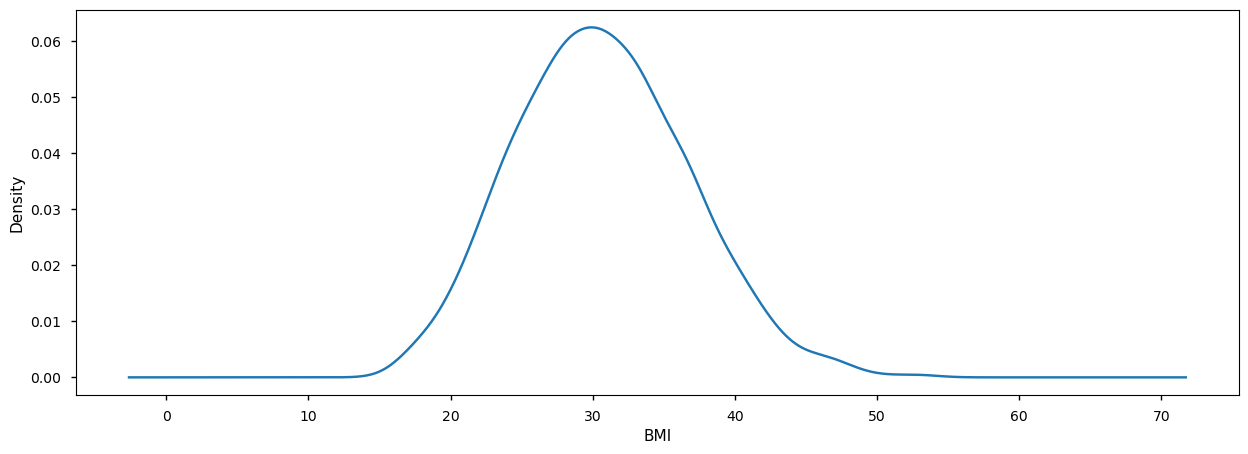

Mean: 30.66, Standard Deviation: 6.10


In [60]:
fig, ax = plt.subplots(figsize=(15, 5))

med_cost['bmi'].plot.density(ax=ax);
plt.xlabel('BMI')
plt.show()
print('Mean: {0:.2f}, Standard Deviation: {1:.2f}'.format(med_cost['bmi'].mean(),med_cost['bmi'].std()))

Naturally, BMI has normal distribution, with mean of 30.66 and standard deviation of 6.10<br><br>

### Relationship Between _smoker_ and _charges_

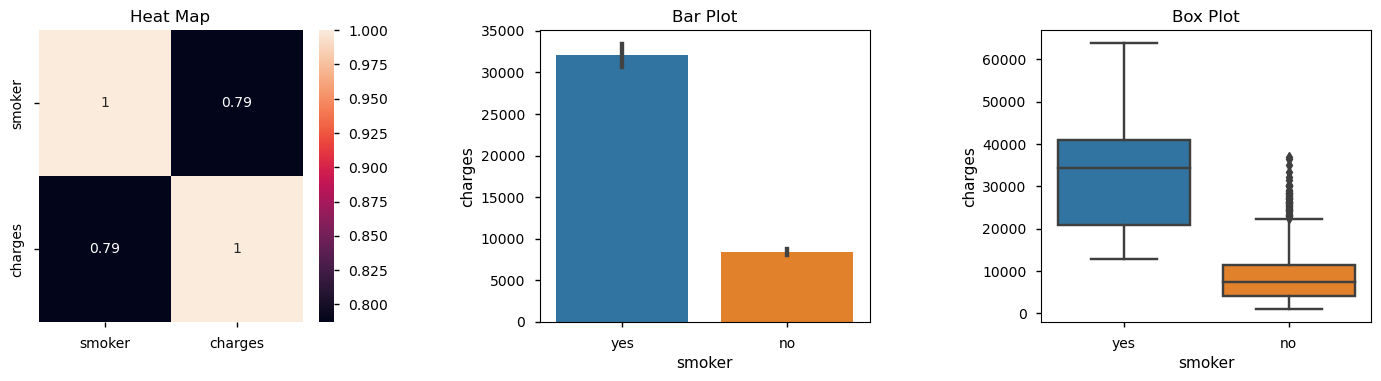

In [61]:
fig, (ax1,ax2,ax3) = plt.subplots(1,3,figsize=(15, 5))

tmp_df = med_cost[['smoker', 'charges']].copy()

sns.barplot(x="smoker",y="charges", ax=ax2, data=tmp_df)
ax2.title.set_text('Bar Plot')
sns.boxplot(x="smoker",y="charges", ax=ax3, data=tmp_df)
ax3.title.set_text('Box Plot')

tmp_df.loc[:,'smoker'].replace(['no', 'yes'], [0, 1] , inplace=True)

sns.heatmap(tmp_df.corr(), annot=True, ax=ax1)
ax1.title.set_text('Heat Map')


plt.tight_layout(pad=5.0)
plt.show()

<br><br>

### Relationship Between _smoker_ and _region_

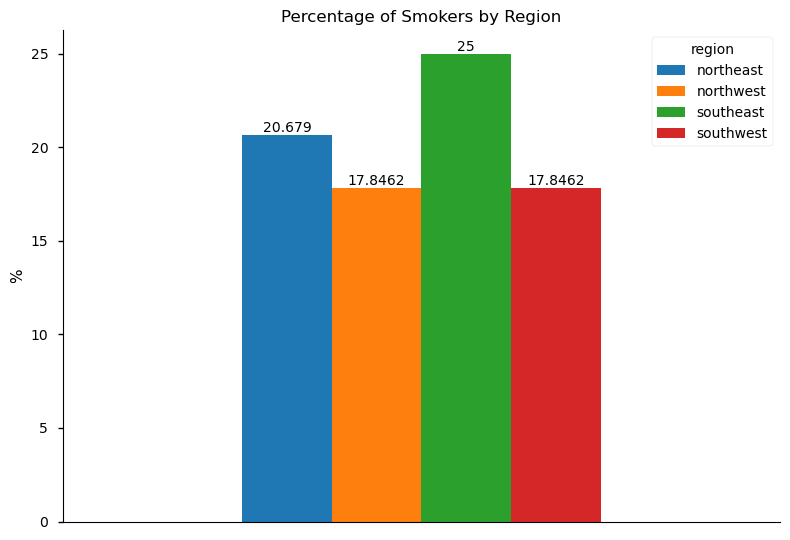

In [62]:
tmp_df = med_cost.copy()
ax = tmp_df.groupby('region')['smoker'].value_counts(normalize=True).unstack()[['yes']].mul(100).T.plot(kind="bar")
for container in ax.containers:
    ax.bar_label(container)

plt.title('Percentage of Smokers by Region')
plt.ylabel('%')
ax.set_xticks([])
sns.despine()
plt.xlabel('')
plt.tight_layout()
plt.show()

<br><br>

### Relationship Between _bmi_ and _sex_

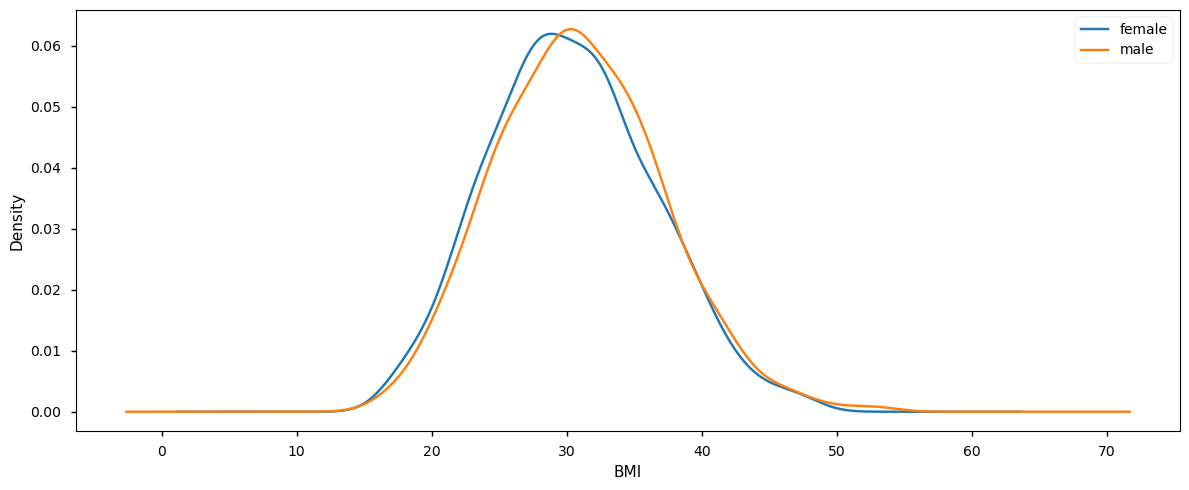

In [63]:
fig, ax = plt.subplots(figsize=(12, 5))

med_cost[med_cost['sex']=='female'].loc[:,'bmi'].plot.density(label='female', ax=ax);
med_cost[med_cost['sex']=='male'].loc[:,'bmi'].plot.density(label='male',ax=ax);

plt.xlabel('BMI')
plt.legend()
plt.tight_layout()
plt.show()

<br><br>

### The _region_ with the most _children_

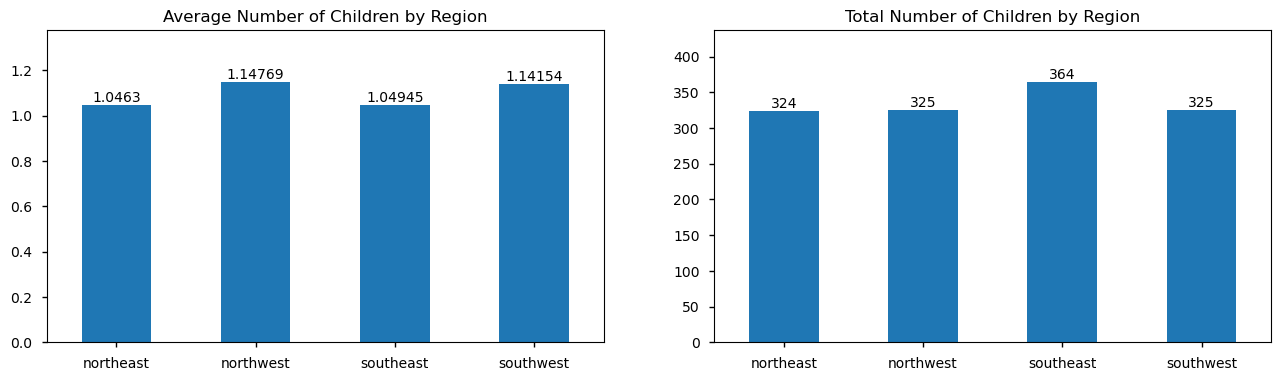

In [7]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(14, 5))

tmp_df = med_cost.copy()
tmp_df.groupby('region')['children'].mean().plot(kind='bar',ax=ax1)
tmp_df.groupby('region')['children'].count().plot(kind='bar',ax=ax2)

ax1.set_title('Average Number of Children by Region')
ax1.tick_params(labelrotation=0)
ax1.set_xlabel('')
ax1.set_ymargin(0.2)
for container in ax1.containers:
    ax1.bar_label(container)

ax2.set_title('Total Number of Children by Region')
ax2.tick_params(labelrotation=0)
ax2.set_xlabel('')
ax2.set_ymargin(0.2)
for container in ax2.containers:
    ax2.bar_label(container)

plt.tight_layout(pad=5.0)
plt.show()

<br><br>

### Relationship Between _age_ and _bmi_

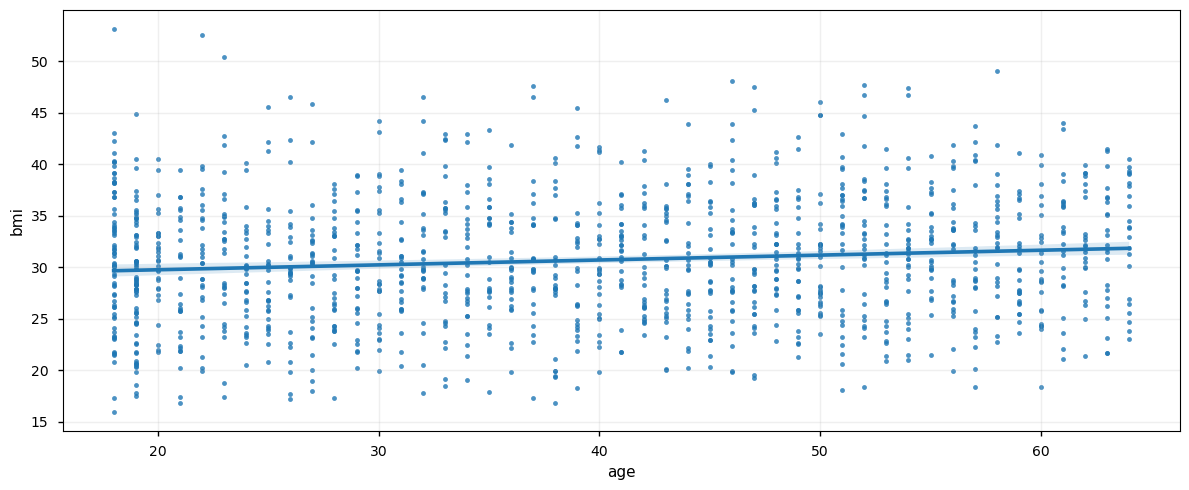

In [8]:
fig, ax = plt.subplots(figsize=(12,5))

sns.regplot(x = 'age', y = 'bmi', data = med_cost, marker='.')
ax.grid(True,alpha=0.2)

plt.tight_layout()
plt.show()

<br><br>

### Relationship Between _bmi_ and _children_

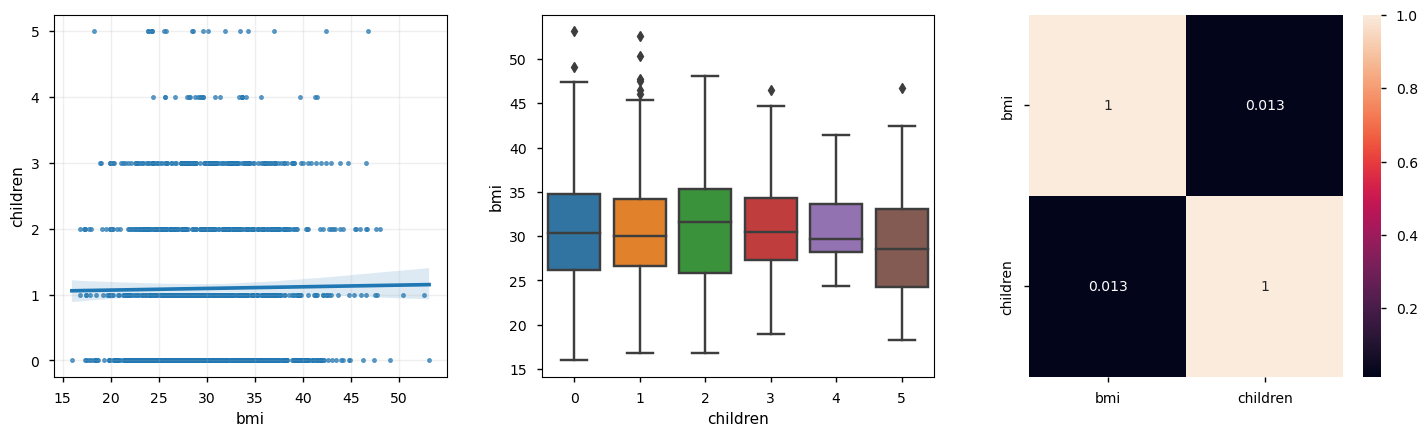

In [9]:
fig, (ax1,ax2,ax3) = plt.subplots(1,3,figsize=(15,5))

sns.regplot(x = 'bmi', y = 'children', data = med_cost, marker='.',ax=ax1)
ax1.grid(True,alpha=0.2)

sns.boxplot(x='children', y='bmi', data=med_cost, ax=ax2)

tmp_df = med_cost[['bmi', 'children']].copy()
sns.heatmap(tmp_df.corr(), annot=True, ax=ax3)

plt.tight_layout(pad=3.0)
plt.show()

<br><br>

### Outliers in the _bmi_ Variable

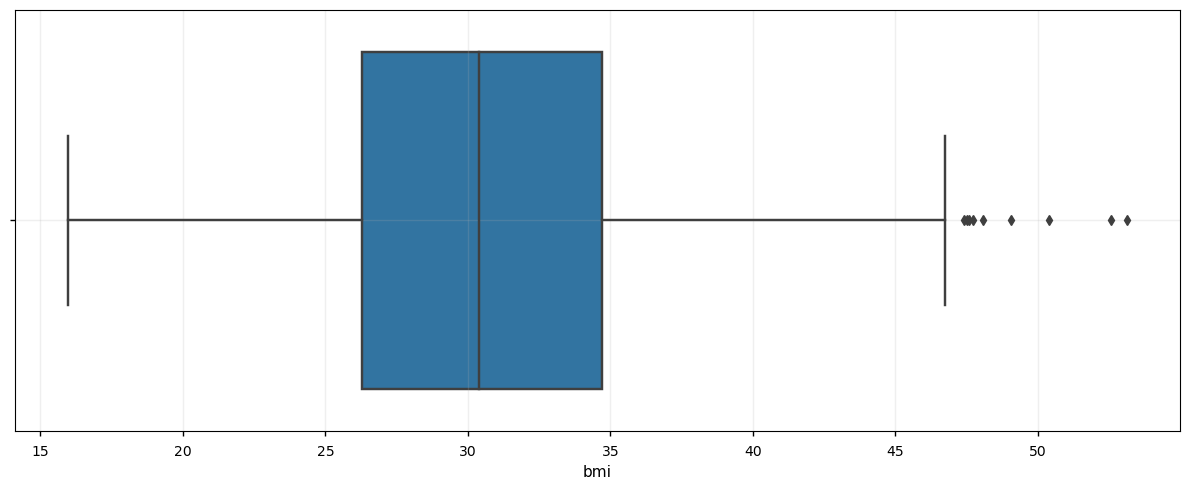

There are 9 outliers among 1338 data points in the bmi variable


In [64]:
fig, ax = plt.subplots(figsize=(12,5))

sns.boxplot(x='bmi',data=med_cost, ax=ax)
ax.grid(True, alpha=0.2)

plt.tight_layout()
plt.show()

tmp_df = med_cost[['bmi']].copy()
Q1 = tmp_df.quantile(0.25)
Q3 = tmp_df.quantile(0.75)
IQR = Q3 - Q1
n_bmi_outliers = ((tmp_df < (Q1 - 1.5 * IQR)) | (tmp_df > (Q3 + 1.5 * IQR))).sum()['bmi']
print('There are {} outliers among {} data points in the bmi variable'.format(n_bmi_outliers,tmp_df['bmi'].count()))

<br><br>

### Relationship Between _bmi_ and _charges_

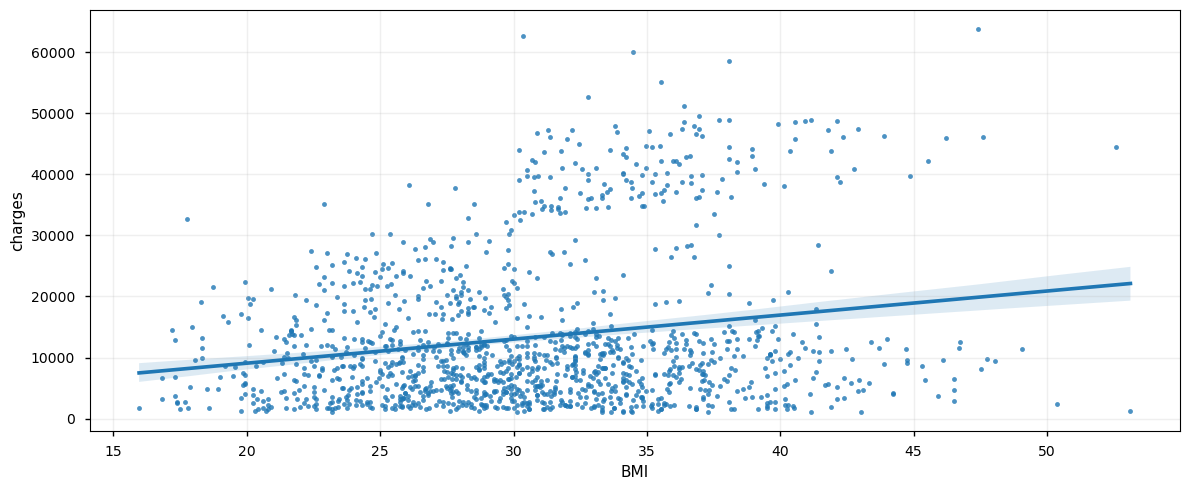

In [65]:
fig, ax = plt.subplots(figsize=(12,5))

sns.regplot(x = 'bmi', y = 'charges', data = med_cost, marker='.')
ax.grid(True,alpha=0.2)

plt.xlabel('BMI')
plt.tight_layout()
plt.show()

<br><br>

### Relationship Between _region_, _smoker_ and _bmi_

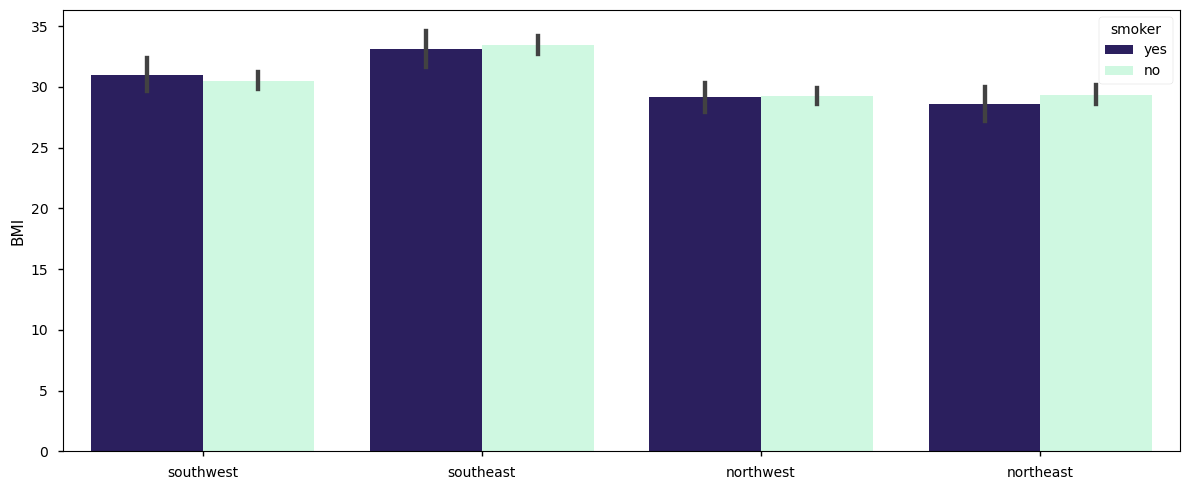

In [66]:
fig, ax = plt.subplots(figsize=(12,5))

sns.barplot(x='region', y='bmi', data=med_cost, hue='smoker', ax=ax, palette=['#241468','#C8FFE0'])

plt.xlabel('')
plt.ylabel('BMI')
plt.tight_layout()
plt.show()

<br><br>

## Data Preprocessing

In [13]:
med_cost.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [14]:
med_cost[['sex', 'smoker', 'region']] = med_cost[['sex', 'smoker', 'region']].astype('category')
med_cost.dtypes

age            int64
sex         category
bmi          float64
children       int64
smoker      category
region      category
charges      float64
dtype: object

In [17]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
med_cost['sex'] = labelencoder.fit_transform(med_cost['sex'].values)
med_cost['smoker'] = labelencoder.fit_transform(med_cost['smoker'].values)
med_cost['region'] = labelencoder.fit_transform(med_cost['region'].values)
med_cost.dtypes

age           int64
sex           int64
bmi         float64
children      int64
smoker        int32
region        int32
charges     float64
dtype: object

In [20]:
from sklearn.model_selection import train_test_split

X = med_cost.drop('charges', axis=1)
y = med_cost['charges']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [30]:
from sklearn.preprocessing import StandardScaler
s_scaler = StandardScaler()
X_train = s_scaler.fit_transform(X_train)
X_test = s_scaler.transform(X_test)

<br><br>

## Model Selection

### Linear Regression

In [42]:
from sklearn.linear_model import LinearRegression
linear_reg = LinearRegression().fit(X_train, y_train)

### Ridge Regression

In [43]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge().fit(X_train, y_train)

### Lasso Regression

In [48]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso().fit(X_train, y_train)

### Decision Trees

In [44]:
from sklearn.tree import DecisionTreeRegressor
dectree_reg = DecisionTreeRegressor().fit(X_train, y_train)


### Random Forest

In [50]:
from sklearn.ensemble import RandomForestRegressor
randforest_reg = RandomForestRegressor().fit(X_train, y_train)

### Cross Validation

In [57]:
from sklearn.model_selection import cross_val_score

model_list = [('Linear Regression',linear_reg),('Ridge Regression',ridge_reg),('Lasso Regression',lasso_reg),('Decision Trees',dectree_reg),('Random Forest',randforest_reg),]

for model_name, model in model_list:
    tmp = cross_val_score(model, X_train, y_train, scoring='r2').mean()
    print(f'{model_name} R2 Score: {tmp}')


Linear Regression R2 Score: 0.7473502619618715
Ridge Regression R2 Score: 0.7473513956141005
Lasso Regression R2 Score: 0.7473559357995321
Decision Trees R2 Score: 0.7276736673261729
Random Forest R2 Score: 0.8412371650096423


Because it got remarkably higher R2 score, Random Forest model is chosen.

<br><br>

## Hyper-Parameter Optimization

In [71]:
from sklearn.model_selection import GridSearchCV

randforest_reg = RandomForestRegressor()

param_grid = {'max_features' : list(range(1,6)),
              'criterion'    : ['squared_error', 'absolute_error'],
              'n_estimators' : list(range(100,500,100)),
              'max_depth'    : list(range(2, 10))
                 }


grid_search = GridSearchCV(randforest_reg, param_grid=param_grid)
grid_search.fit(X_train,y_train)

print(grid_search.best_params_)
print(grid_search.best_score_)

{'criterion': 'squared_error', 'max_depth': 5, 'max_features': 4, 'n_estimators': 100}
0.8630077679099951


<br><br>

## Model Evaluation

In [92]:
randforest_reg = RandomForestRegressor(criterion='squared_error', max_depth=5, max_features=4, n_estimators=100).fit(X_train,y_train)
y_pred = randforest_reg.predict(X_test)

In [94]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

print('Root Mean Squared Error - RMSE: {}'.format(np.sqrt(mean_squared_error(y_pred,y_test))))
print('Mean Absolute Error - MAE: {}'.format(mean_absolute_error(y_pred,y_test)))

Root Mean Squared Error - RMSE: 4805.73901831119
Mean Absolute Error - MAE: 2666.1479758227247
